In [ ]:
import random
import numpy as np
import sympy
import string
import time
import matplotlib.pyplot as plt


In [ ]:
def print_matrix(A, b):
    print("Matrix A:")
    for row in A:
        print(row)
    print("RHS b:\n", b)

def jacobi(A, b, niteraci, x0=None):
    x = x0 if x0 else np.ones(len(A))
    D = np.diag(A)
    R = A - np.diagflat(D)
    for i in range(niteraci):
        x = (b - np.dot(R,x))/D
    return x

def cramer(A, b):
    N = A.shape[1]
    mask = np.broadcast_to(np.diag([1 for i in range(N)]), [N, N, N]).swapaxes(0, 1)
    Ai = np.where(mask, np.repeat(b, N).reshape(N, N), A)
    x = np.linalg.det(Ai) / np.linalg.det(A)
    return x

def generate_random_matrix(n, amin, amax):
    A = np.array([[random.randint(amin, amax) for j in range(n)] for i in range(n)])
    b = np.array([random.randint(amin, amax) for i in range(n)])
    return A, b

In [ ]:
osaX=[]
osaY_jacobi=[]
osaY_cramer=[]
osaY_symbol=[]
jacobi_casy=[]
cramer_casy=[]
symbol_casy=[]

icko=0
jecko=0

n=1
maximum_matice=50
pokusy=10

In [ ]:

for icko in range(maximum_matice):
  A, b = generate_random_matrix(n, amin=-10, amax=10)
  #print_matrix(A, b)
  osaX.append(n)
  
  for jecko in range(pokusy):
    start = time.time()
    x_iter = jacobi(A, b, 25)
    end = time.time()
    rozdil=(end-start)
    jacobi_casy.append(rozdil)
    start = time.time()
    x_cramer = cramer(A, b)
    end = time.time()
    rozdil=(end-start)
    cramer_casy.append(rozdil)
    jecko+=1

  jacobi_prumer=sum(jacobi_casy)/len(jacobi_casy)*1000
  cramer_prumer=sum(cramer_casy)/len(cramer_casy)*1000
  icko+=1
  n+=1
  osaY_jacobi.append(jacobi_prumer)
  osaY_cramer.append(cramer_prumer)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [ ]:
print("Iterační řešení - časy v milisekundách")
print("Velikost matice: ",osaX)
print("Časy: ",osaY_jacobi)
print("\n###########################\n")
print("Cramerovo řešení - časy v milisekundách")
print("Velikost matice: ",osaX)
print("Časy: ",osaY_cramer)

Iterační řešení - časy v milisekundách
Velikost matice:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Časy:  [0.1219034194946289, 0.173187255859375, 0.15558401743570965, 0.1461803913116455, 0.1416158676147461, 0.13815959294637045, 0.1457691192626953, 0.1427382230758667, 0.14043384128146702, 0.139007568359375, 0.13759352944113992, 0.13848543167114258, 0.13953905839186448, 0.140883241380964, 0.14146804809570312, 0.14203935861587524, 0.1426360186408548, 0.14462338553534612, 0.14559344241493627, 0.1463913917541504, 0.14750843956356957, 0.14841123060746628, 0.15324302341627036, 0.1535654067993164, 0.15475177764892578, 0.15583130029531625, 0.1564078860812717, 0.15736477715628489, 0.15816852964203934, 0.15910545984903973, 0.16431193197927166, 0.1705564558506012, 0.17250162182432233, 0.17341936335844152, 0.180858884538923, 0.18209086524115667, 0.183

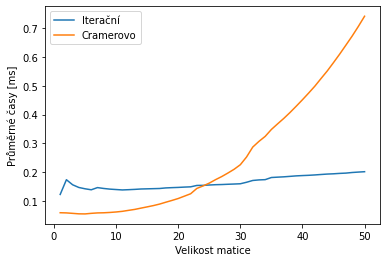

In [ ]:
plt.plot(osaX, osaY_jacobi, label="Iterační")
plt.plot(osaX, osaY_cramer, label="Cramerovo")
plt.ylabel('Průměrné časy [ms]')
plt.xlabel('Velikost matice')
plt.legend()
plt.show()